<a href="https://colab.research.google.com/github/Raunak001/Stock-Tracking-Algorithm/blob/main/Stock_Tracking_Program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tweepy

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

import matplotlib.pyplot as plt
import tweepy

In [ ]:
company = 'AAPL'

start = dt.datetime(2005, 1, 1)
end = dt.datetime(2020, 12, 27)

data = web.DataReader(company, 'stooq', start, end)

# print(type(data))
# print(data)

# data['Close'].values.reshape(-1, 1)


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

prediction_days = 10

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x - prediction_days:x, 0])
  y_train.append(scaled_data[x, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [ ]:
x = 20
y = 0.2

model = Sequential()

model.add(LSTM(units=x, return_sequences=True, input_shape=(x_train.shape[1], 1) ))
model.add(Dropout(y))
model.add(LSTM(units=x, return_sequences=True))
model.add(Dropout(y))
model.add(LSTM(units=x))
model.add(Dropout(y))
model.add(Dense(units=1)) # Prediction of the next closing day

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
126/126 [==============================] - 7s 16ms/step - loss: 0.0070
Epoch 2/25
126/126 [==============================] - 2s 16ms/step - loss: 0.0017
Epoch 3/25
126/126 [==============================] - 2s 16ms/step - loss: 0.0014
Epoch 4/25
126/126 [==============================] - 2s 16ms/step - loss: 0.0011
Epoch 5/25
126/126 [==============================] - 2s 16ms/step - loss: 0.0012
Epoch 6/25
126/126 [==============================] - 2s 16ms/step - loss: 9.8466e-04
Epoch 7/25
126/126 [==============================] - 2s 16ms/step - loss: 9.6146e-04
Epoch 8/25
126/126 [==============================] - 2s 16ms/step - loss: 9.6521e-04
Epoch 9/25
126/126 [==============================] - 2s 16ms/step - loss: 8.9482e-04
Epoch 10/25
126/126 [==============================] - 2s 16ms/step - loss: 8.0608e-04
Epoch 11/25
126/126 [==============================] - 2s 16ms/step - loss: 9.0754e-04
Epoch 12/25
126/126 [==============================] - 2s 16ms/step - lo

In [ ]:
# Test Data

test_start = dt.datetime(2021, 1, 1)
test_end = dt.datetime.now()

test_data = web.DataReader(company, 'stooq', test_start, test_end)

actual_price = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']))
# print(total_dataset)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values

model_inputs = model_inputs.reshape(-1, 1)
# print(model_inputs)

model_inputs = scaler.transform(model_inputs)
# print(model_inputs)



In [ ]:
# x_train = []
# y_train = []

# for x in range(prediction_days, len(scaled_data)):
#   x_train.append(scaled_data[x - prediction_days:x, 0])
#   y_train.append(scaled_data[x, 0])

# x_train = np.array(x_train)
# y_train = np.array(y_train)

# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


x_test = []

for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))





In [ ]:
predicted_prices = model.predict(x_test)

predicted_prices = scaler.inverse_transform(predicted_prices)
# print(predicted_prices)

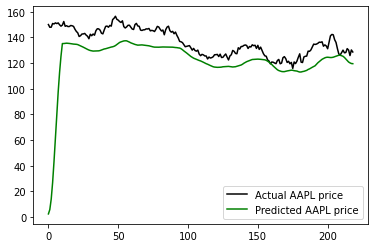

In [ ]:
plt.plot(actual_price, color="black", label=f"Actual {company} price")
plt.plot(predicted_prices, color="green", label=f"Predicted {company} price")
plt.legend()
plt.savefig('APPL_Stock_Prediction.png')
plt.show()

In [ ]:
def Tweet():
  API_Key = ""
  API_Secret_Key = ""
  Access_Token = ""
  Access_Token_Secret = ""

  auth = tweepy.OAuthHandler(API_Key, API_Secret_Key)
  auth.set_access_token(Access_Token, Access_Token_Secret)

  api = tweepy.API(auth)

  api.update_with_media("/content/APPL_Stock_Prediction.png", "Here is my prediction for the Apple Stock in the next few days")

In [ ]:
#Tweet()